In [11]:
import os
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from mpl_toolkits.axes_grid1 import ImageGrid

# Getting 3 Samples of Normal & Pneumonia Images

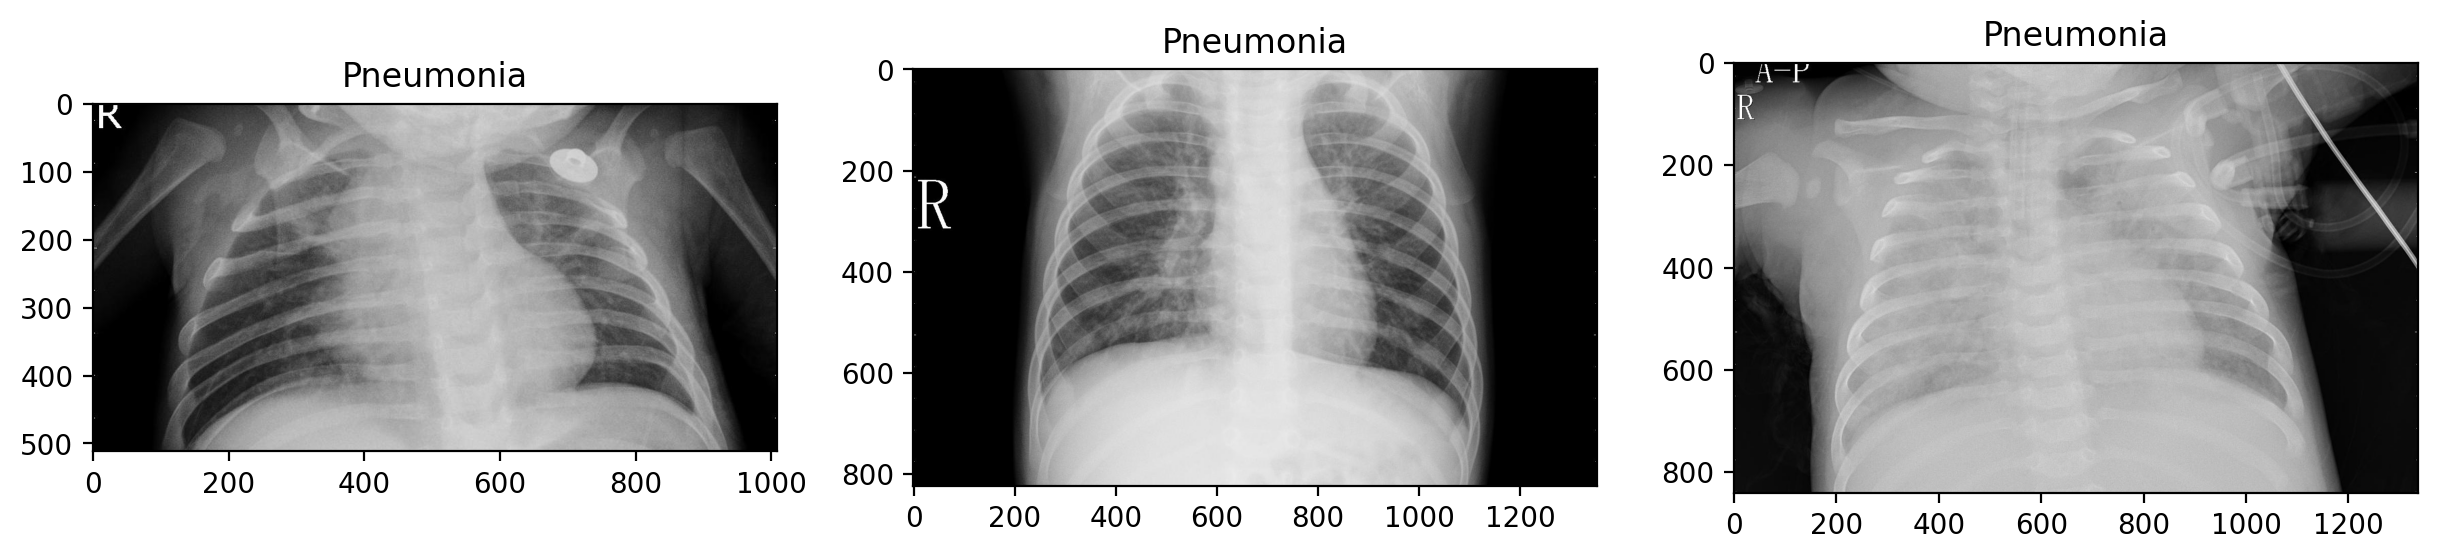

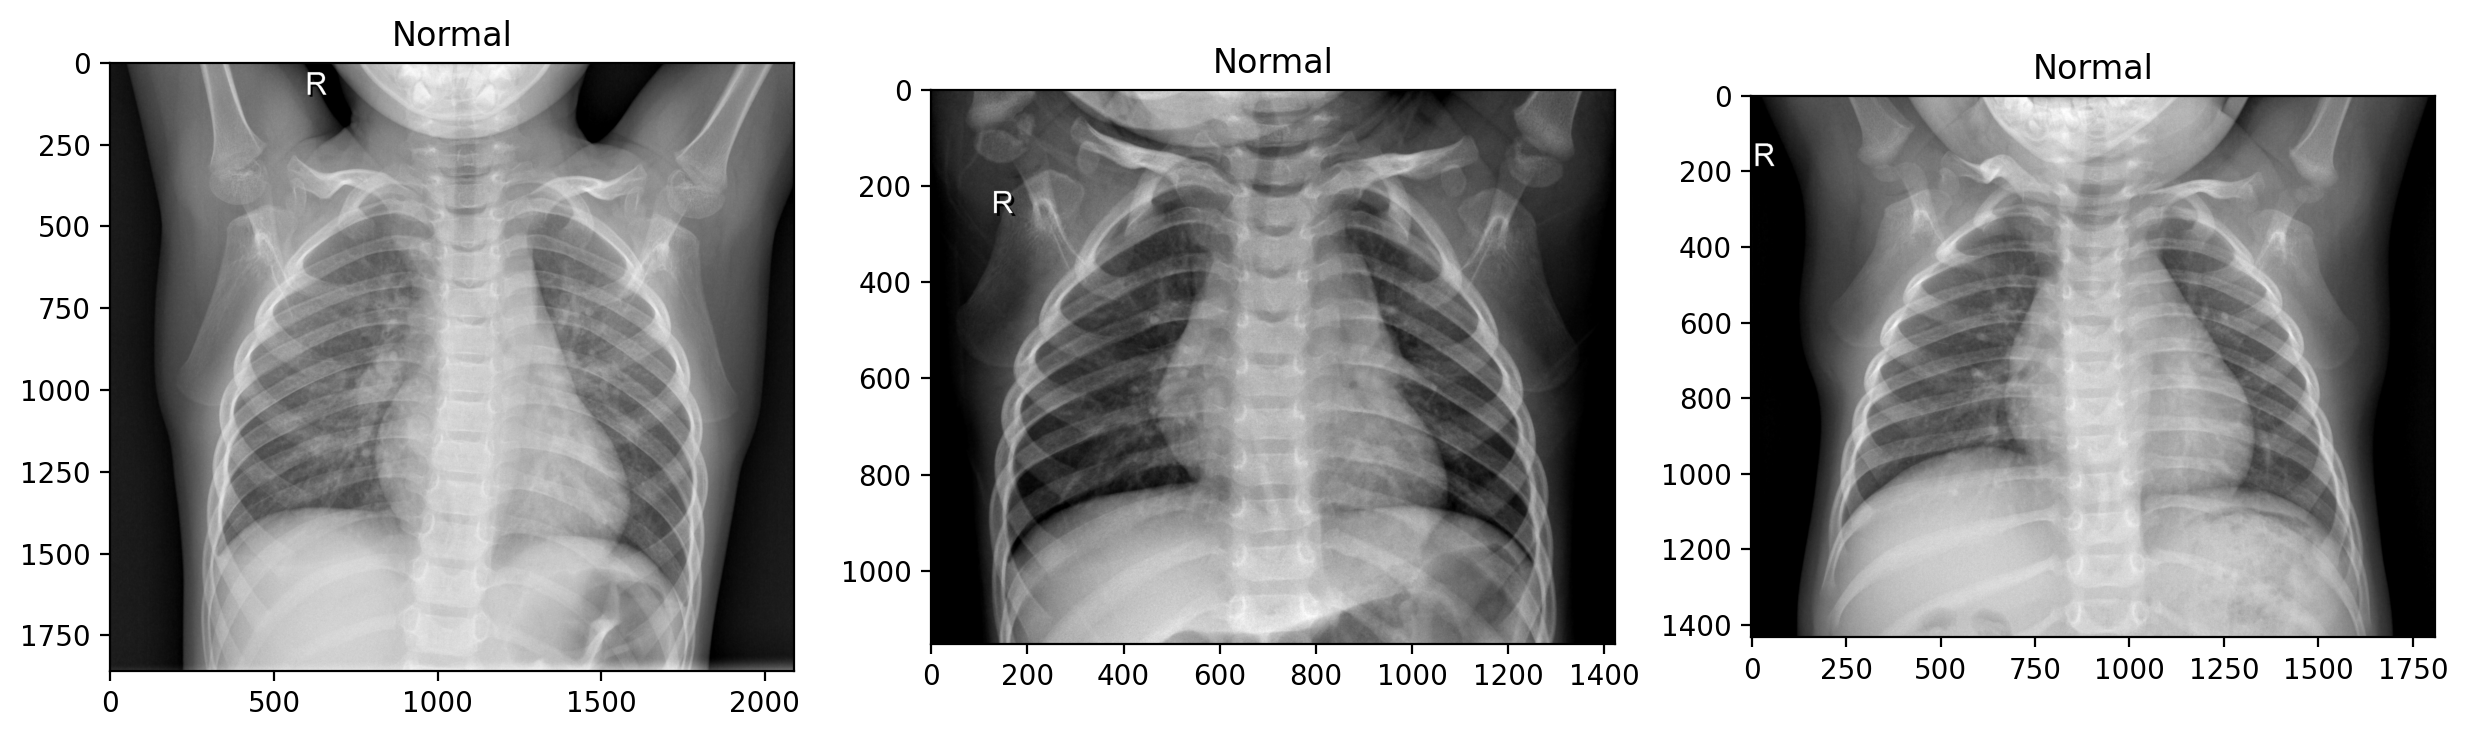

In [12]:
# Get the path to the pneumonia and normal images
pneumonia_path = 'chest_xray_balanced/train/PNEUMONIA/'
normal_path = 'chest_xray_balanced/train/NORMAL/'

# Get the list of pneumonia and normal images
pneumonia_images = os.listdir(pneumonia_path)
normal_images = os.listdir(normal_path)

# Plot 3 samples of pneumonia images
plt.figure(figsize=(15, 5), dpi = 200)
for i in range(3):
  img = cv2.imread(os.path.join(pneumonia_path, pneumonia_images[i]))
  plt.subplot(1, 3, i+1)
  plt.imshow(img)
  plt.title('Pneumonia')
plt.show()

# Plot 3 samples of normal images
plt.figure(figsize=(15, 5), dpi = 200)
for i in range(3):
  img = cv2.imread(os.path.join(normal_path, normal_images[i]))
  plt.subplot(1, 3, i+1)
  plt.imshow(img)
  plt.title('Normal')
plt.show()


# Applying Thresholding Methods to the Images

In [13]:
# Final target size of each image
img_size = 224

In [14]:
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,            # Rotate images randomly up to 40 degrees
    width_shift_range=0.2,        # Shift images horizontally by up to 20%
    height_shift_range=0.2,       # Shift images vertically by up to 20%
    zoom_range=0.2,               # Zoom in/out on images by up to 20%
    shear_range=0.2,              # Shear images by up to 20%
    horizontal_flip=True         # Flip images horizontally
)

# Load training data with data augmentation
train_generator = train_datagen.flow_from_directory(
    directory='chest_xray_balanced/train',              # Directory containing training data
    target_size=(img_size, img_size),                   # Resize images to specified dimensions
    batch_size=32,                                      # Batch size for training
    color_mode='grayscale',                             # Convert images to grayscale
    class_mode='binary',                                # Binary classification (normal/pneumonia)
    shuffle=True                                        # Shuffle data after each epoch
)

# Load validation data without data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)  # No data augmentation for validation
validation_generator = validation_datagen.flow_from_directory(
    directory='chest_xray_balanced/val',                  # Directory containing validation data
    target_size=(img_size, img_size),                     # Resize images to specified dimensions
    batch_size=32,                                        # Batch size for validation
    color_mode='grayscale',                               # Convert images to grayscale
    class_mode='binary',                                  # Binary classification (normal/pneumonia)
    shuffle=True                                          # Shuffle data
)

Found 48 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


Next, we'll extract two samples each from both the Normal and Pneumonia datasets for experimental purposes. This step isn't a part of our preprocessing pipeline but rather a curiosity-driven exploration. The intention is to apply various filtering techniques to these samples and observe their impact, potentially utilizing them as transformed inputs for our model. 

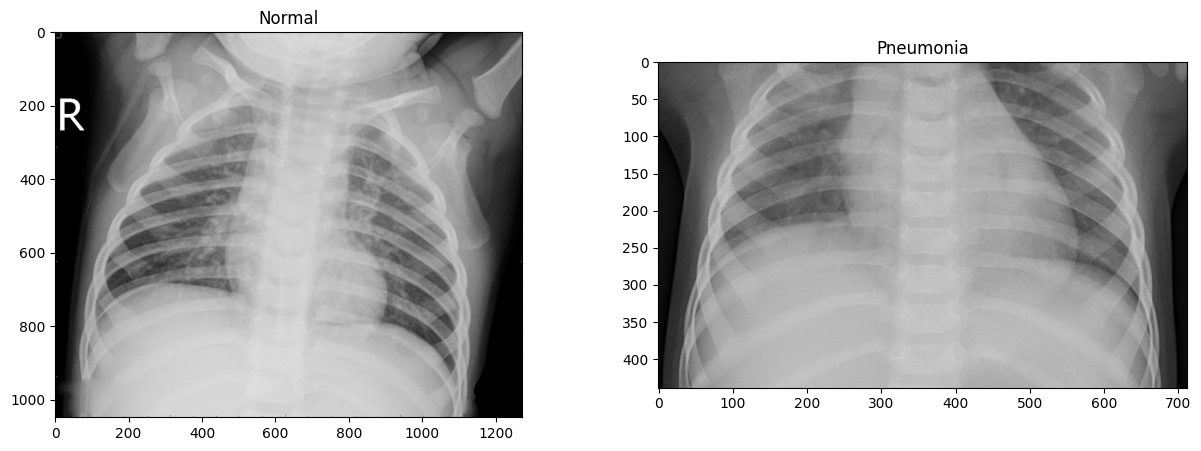

In [15]:
# Set random seed for reproducibility
random.seed(42)

# Get a random sample of Normal and PNEUMONIA images from the train dataset
normal_images = os.listdir(normal_path)
pneumonia_images = os.listdir(pneumonia_path)

random_normal_image = random.choice(normal_images)
random_pneumonia_image = random.choice(pneumonia_images)

# Read the images
normal_img = cv2.imread(os.path.join(normal_path, random_normal_image))
pneumonia_img = cv2.imread(os.path.join(pneumonia_path, random_pneumonia_image))

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(normal_img)
plt.title('Normal')
plt.subplot(1, 2, 2)
plt.imshow(pneumonia_img)
plt.title('Pneumonia')
plt.show()

In [16]:
def plot_thresholding_grid(thresholds, methods, image_sample, img_type):
    """
    Plot a grid of images showing different image thresholding methods applied at various thresholds.

    Parameters:
    - thresholds: List of numerical threshold values to apply.
    - methods: List of thresholding method names as strings. These should correspond to cv2 method names,
               except 'IMAGE_ORIGINAL' which indicates the original image.
    - image_sample: The original image to apply the thresholding methods on.
    """

    # Number of images
    n_images = len(thresholds) * len(methods)

    # Create a figure with ImageGrid
    fig = plt.figure(figsize=(30, 15), dpi=200)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(len(thresholds), len(methods)),  # creates grid of axes
                     axes_pad=0.3,  # Increased pad between axes in inch for a bit more space
                     )

    for i, ax in enumerate(grid):
        threshold = thresholds[i // len(methods)]
        method = methods[i % len(methods)]
        # Apply the thresholding method to the normal image
        if method == 'IMAGE_ORIGINAL':
            filtered_image = image_sample
        else:
            _, filtered_image = cv2.threshold(image_sample, threshold, 255, getattr(cv2, method))

        # Plot the filtered image
        ax.imshow(filtered_image, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

        # Optionally, add labels to the first column and last row
        if i % len(methods) == 0:  # First column
            ax.set_ylabel(f'Thresh: {threshold}', fontsize=16)  # Increased font size
        if i >= n_images - len(methods):  # Last row
            ax.set_xlabel(method, fontsize=16)  # Increased font size

    # Add a title to the figure
    fig.suptitle(f"Grid of Different {img_type} Image Thresholding", fontsize=23, y=0.91)  # Increased font size

    plt.show()

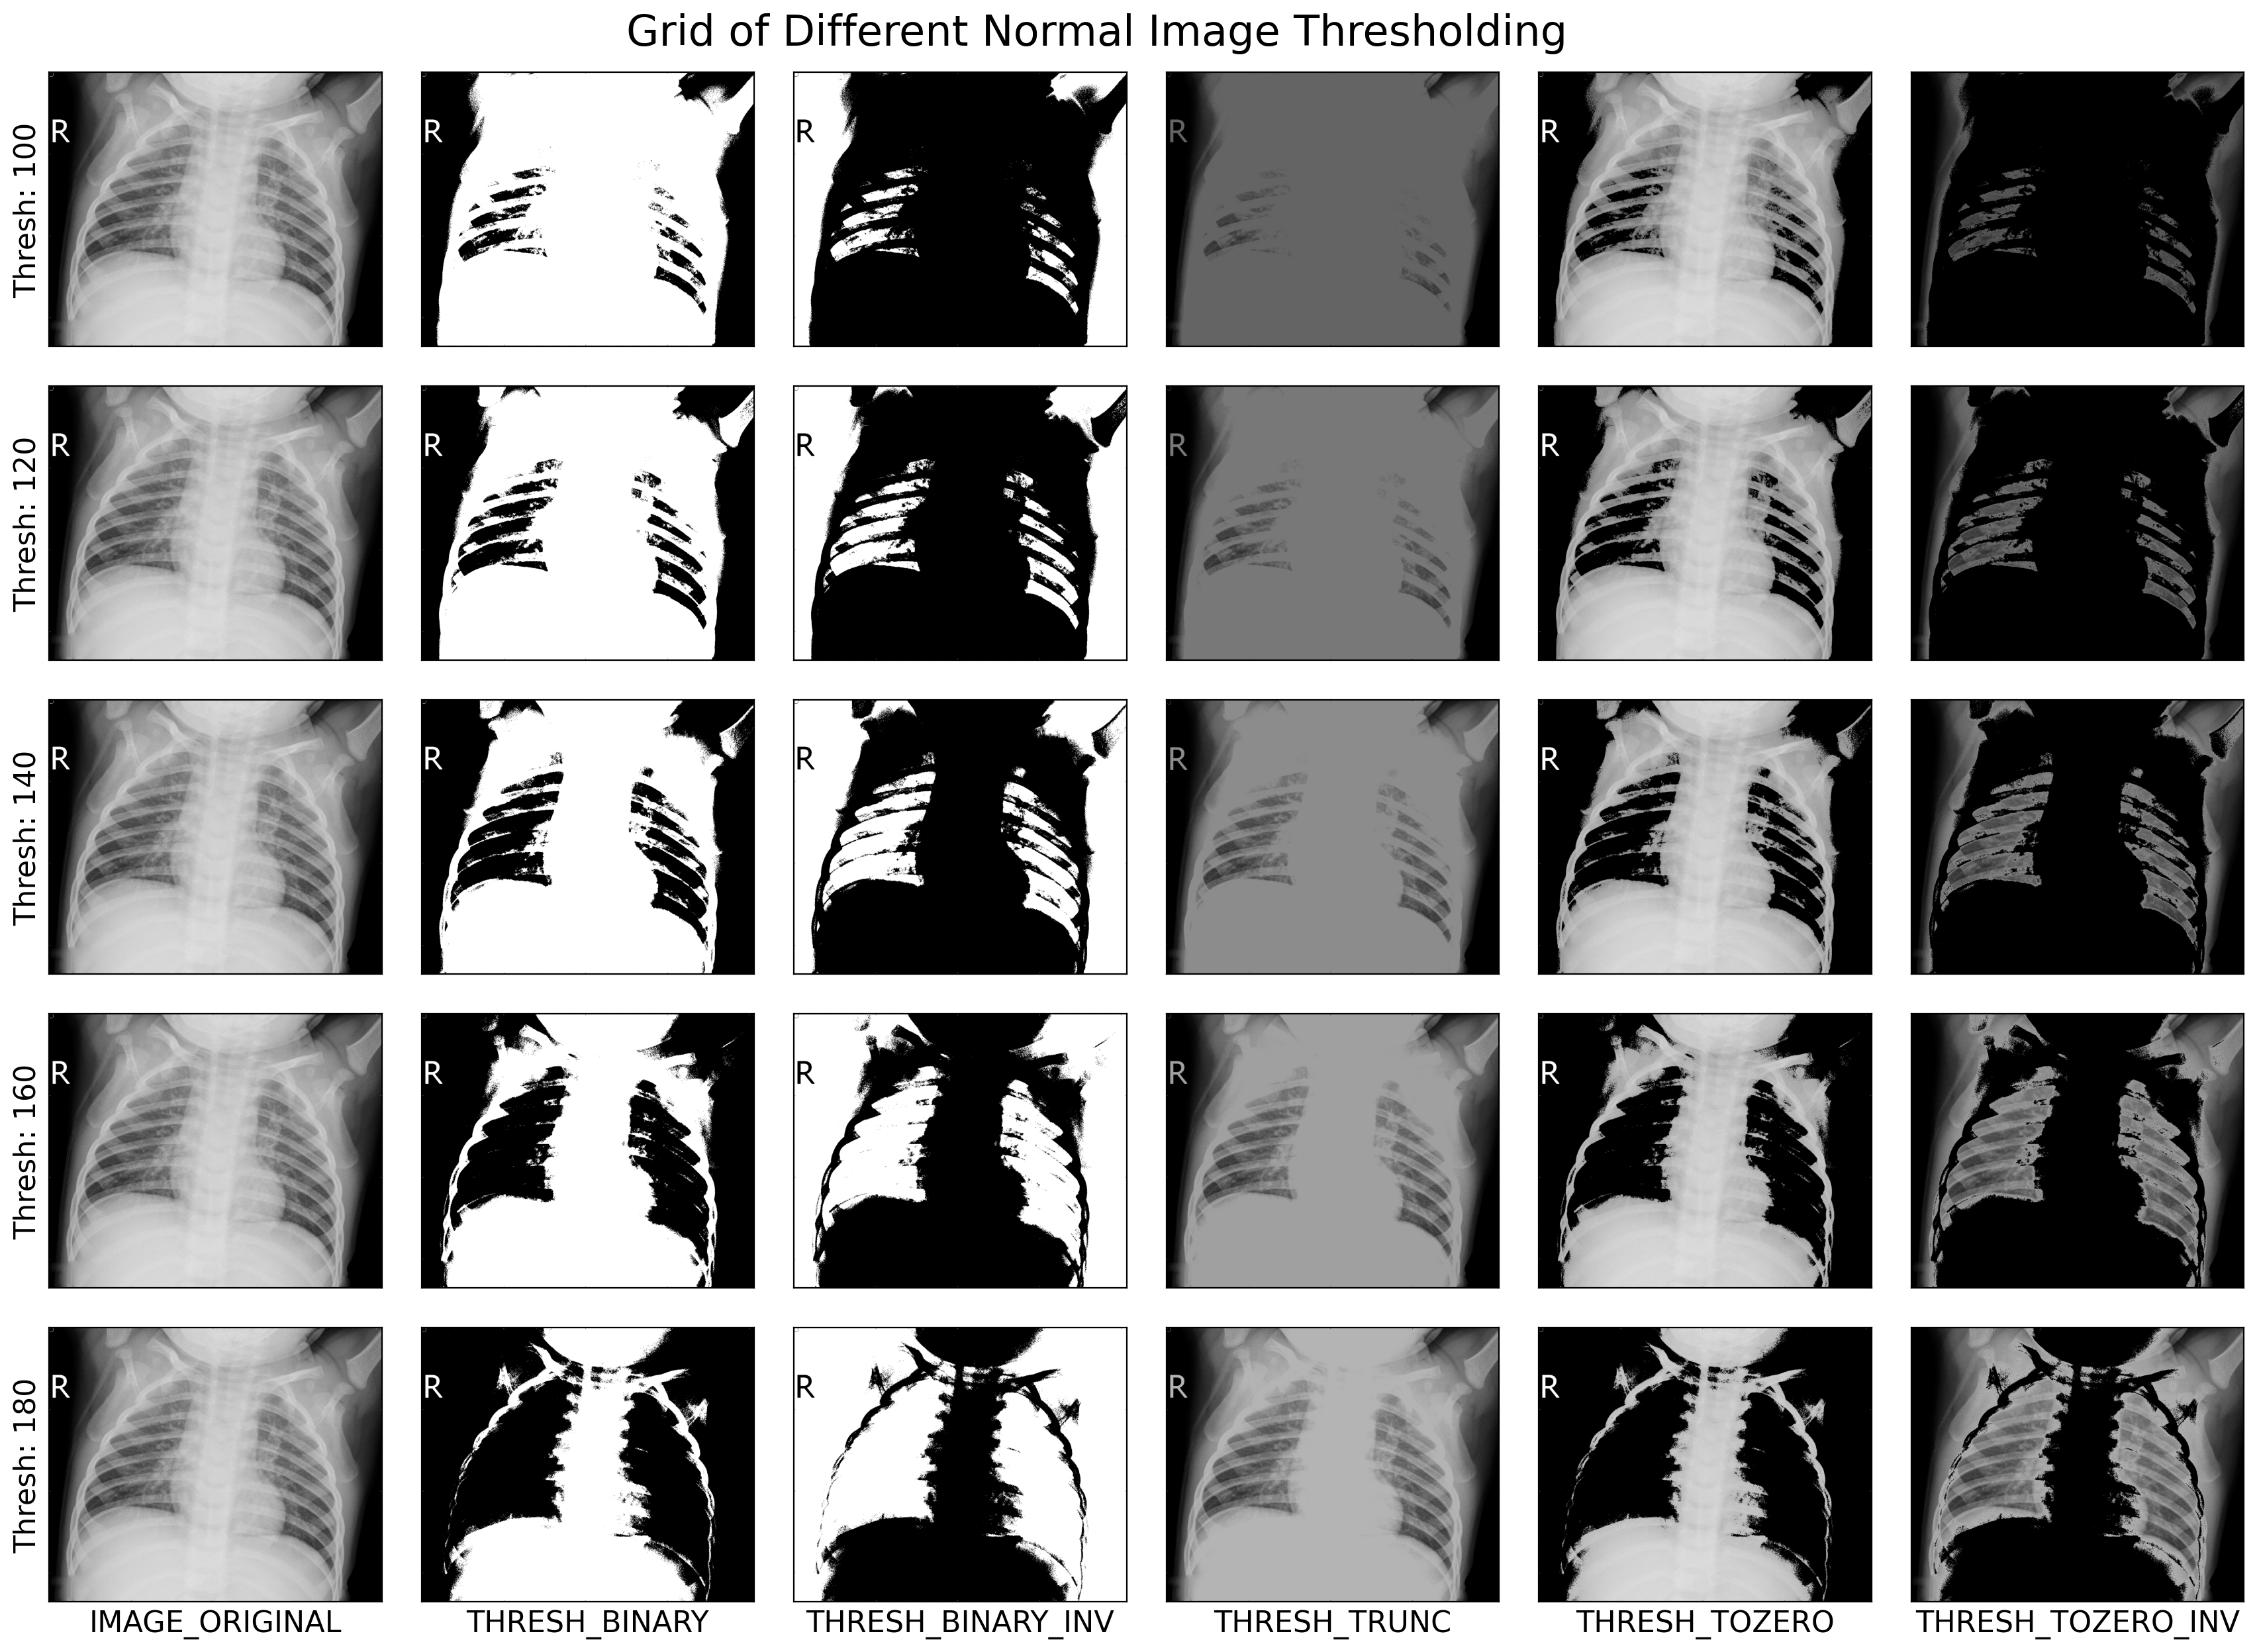

In [17]:
# Set the thresholds
thresholds = [100, 120, 140, 160, 180]

# Set the filtering methods
methods = ['IMAGE_ORIGINAL', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']

plot_thresholding_grid(thresholds, methods, normal_img, img_type = 'Normal')

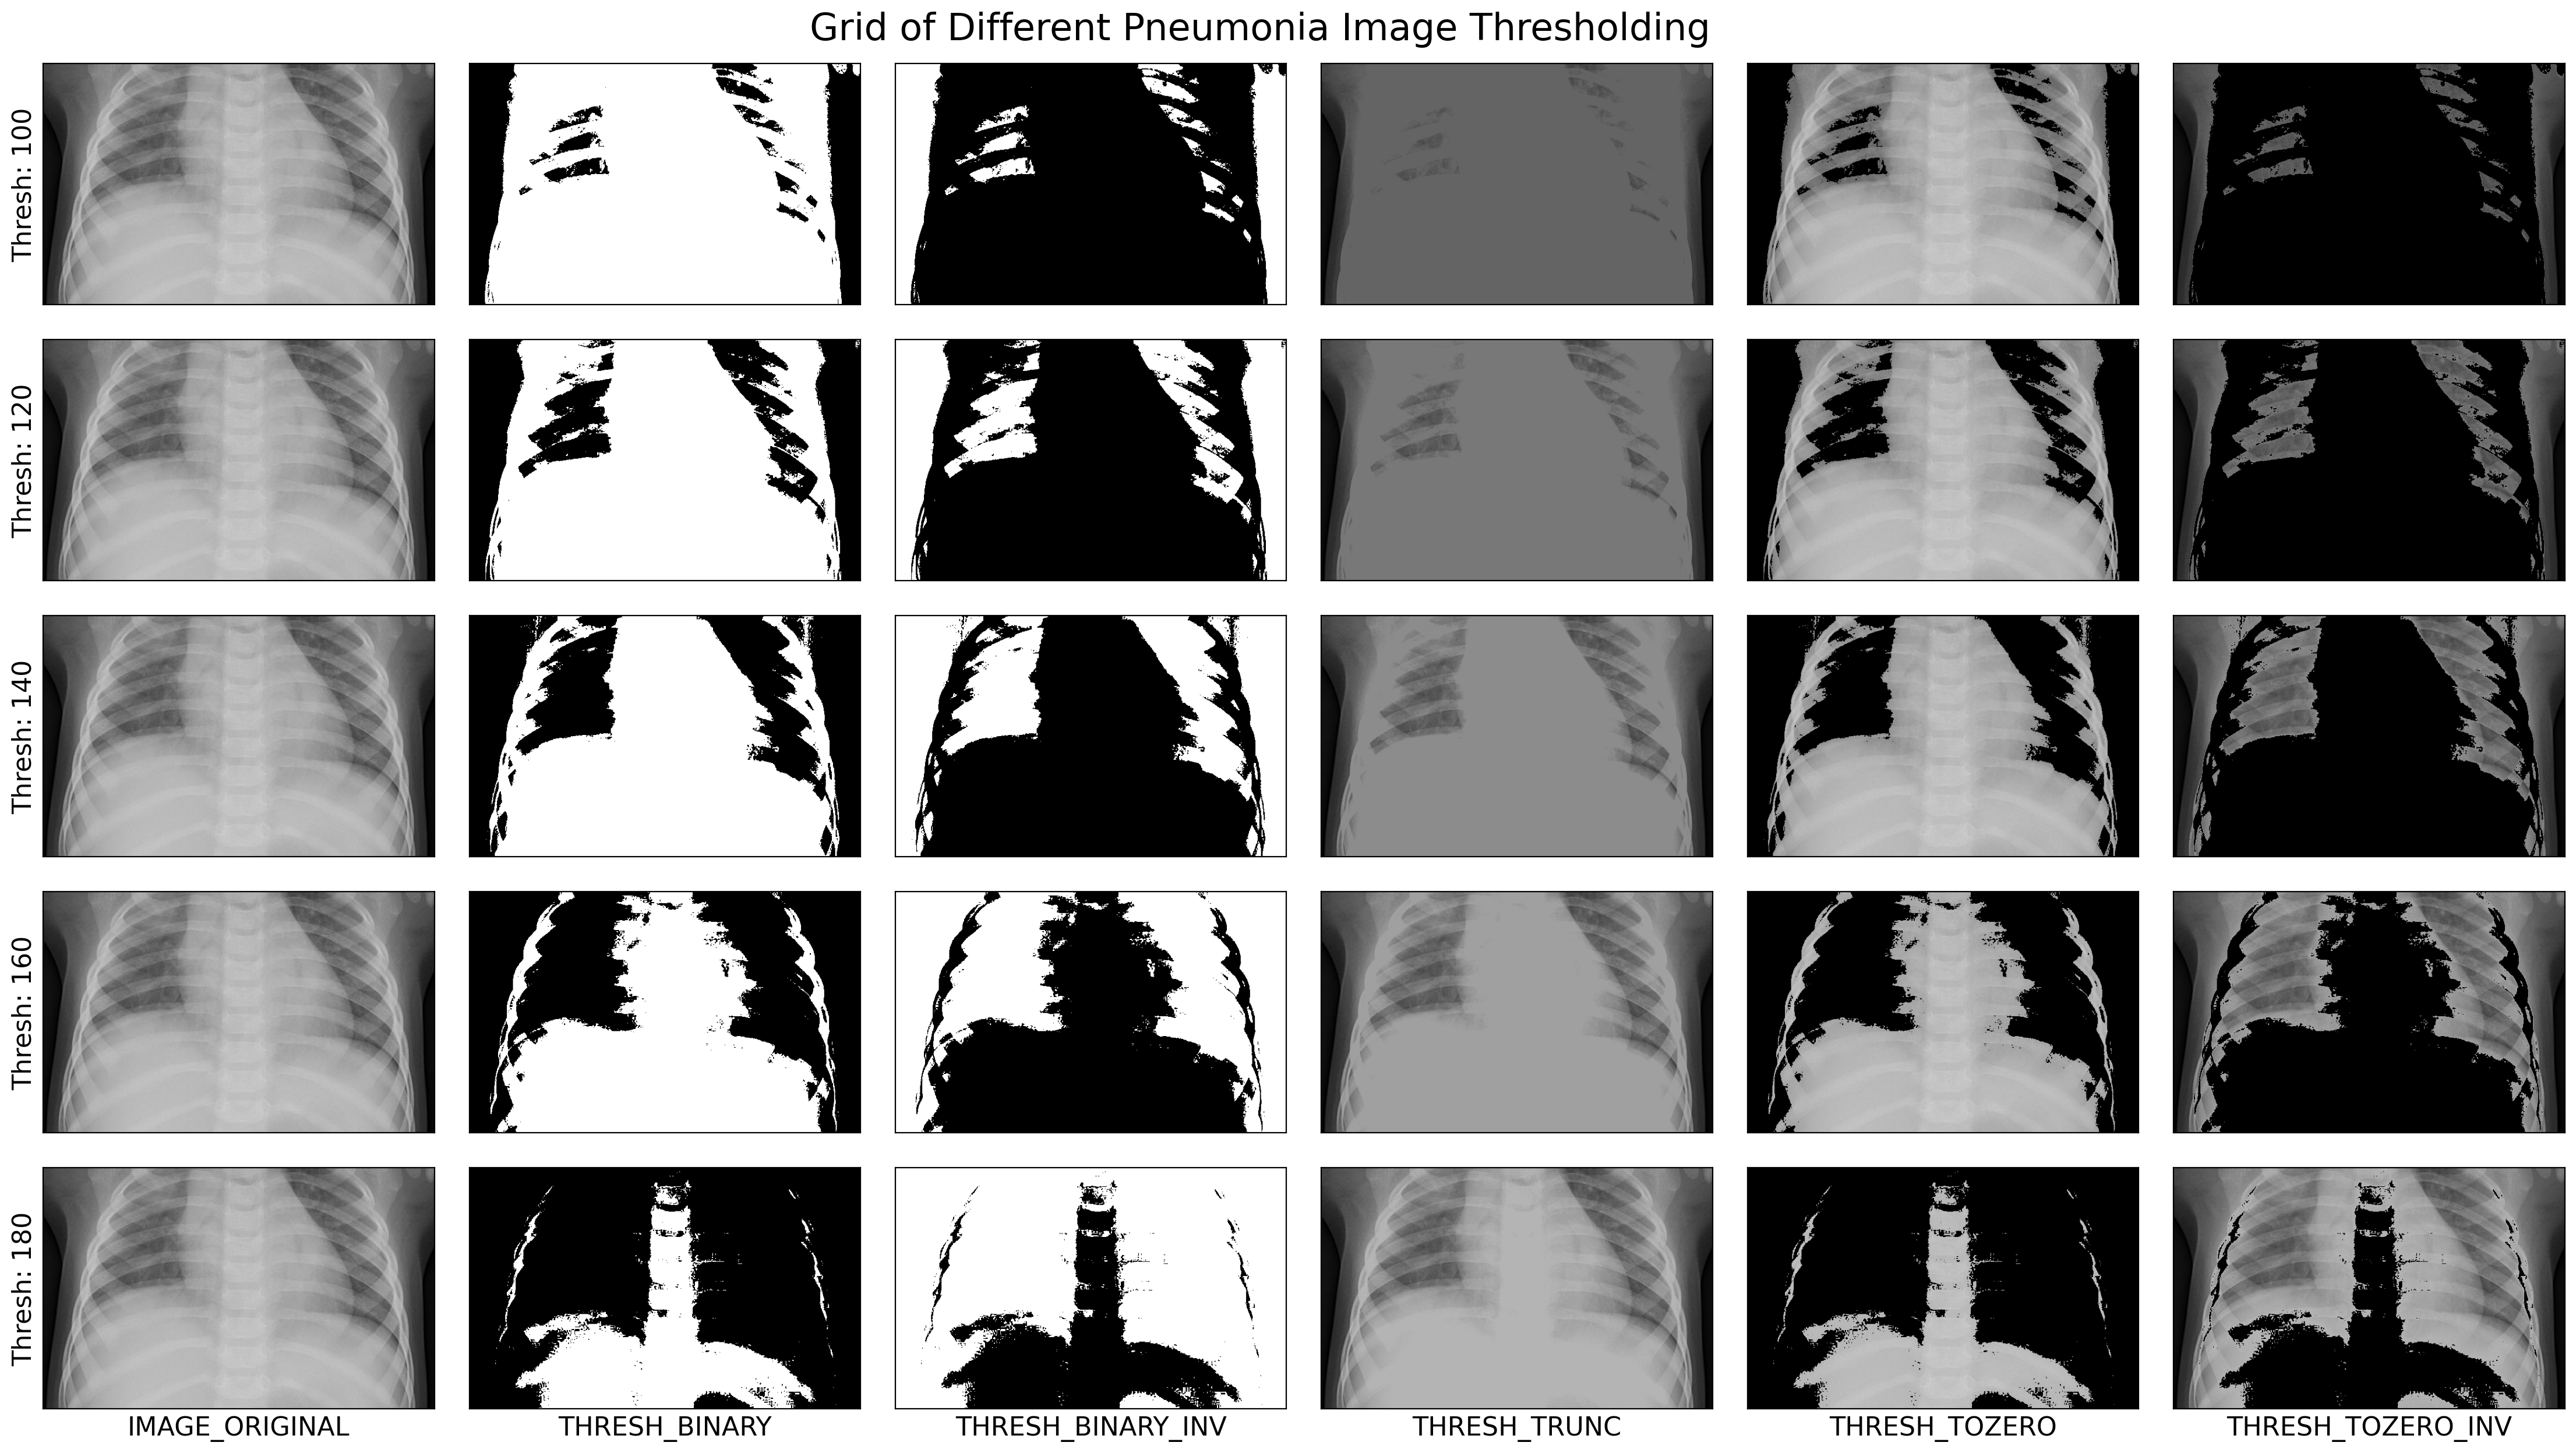

In [18]:
plot_thresholding_grid(thresholds, methods, pneumonia_img, img_type = 'Pneumonia')